In [1]:
#pip install sklearn numpy matplotlib scipy

from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import matplotlib.pyplot as plt 

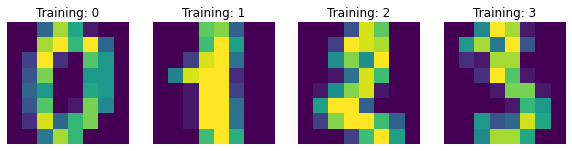

In [13]:
digits = load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [11]:
# flatten the images
n_samples = len(digits.images)
digits.images = digits.images.reshape((n_samples, -1))

(X_train, X_test, y_train, y_test) = train_test_split(
    digits.images, digits.target, test_size=0.25, random_state=42
)

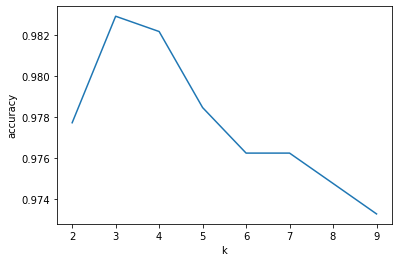

In [4]:
ks = np.arange(2, 10)
scores = []
for k in ks:
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(model, X_train, y_train)
    score.mean()
    scores.append(score.mean())

plt.plot(ks, scores)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

In [5]:
#k=3 was chosen for best accuracy
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

In [6]:
from image_processing import process_image

test_img = process_image('image8.png')
print(model.predict(test_img))


[1]


In [14]:
# Predict the value of the digit on the test subset
predicted = model.predict(X_test)

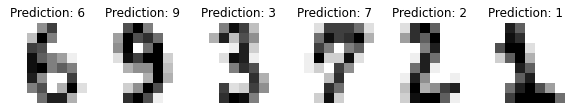

In [18]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")